# **Referencial teórico e prático do SHAP (SHapley Additive exPlanations)**
Os modelos de aprendizado de máquina são poderosos, mas difíceis de interpretar.
No entanto, os valores de SHAP podem ajudar você a entender como os recursos do modelo afetam as previsões.
Os modelos de aprendizado de máquina estão se tornando cada vez mais complexos, avançados e capazes de fazer previsões precisas. Entretanto, à medida que esses modelos se tornam "caixas-pretas", fica ainda mais difícil entender como eles chegaram a essas previsões. Isso levou a um foco crescente na interpretabilidade e explicabilidade do aprendizado de máquina.
Uma das ferramentas mais promissoras para esse processo são os valores SHAP, que medem o quanto cada recurso contribui para a previsão do modelo. Os valores de SHAP podem ajudar você a ver quais recursos são mais importantes para o modelo e como eles afetam o resultado.
Os valores SHAP são baseados na teoria dos jogos e atribuem um valor de importância a cada recurso em um modelo. Os recursos com valores SHAP positivos afetam positivamente a previsão, enquanto aqueles com valores negativos têm um impacto negativo. A magnitude é uma medida de quão forte é o efeito.
Os valores SHAP são independentes de modelo, o que significa que podem ser usados para interpretar qualquer modelo de aprendizado de máquina.



# Caso: **News Groups**

# Dados

In [ ]:
from time import time

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

categories = [
    "alt.atheism",
    "talk.religion.misc",
    "comp.graphics",
    "sci.space",
]


def size_mb(docs):
    return sum(len(s.encode("utf-8")) for s in docs) / 1e6


def load_dataset(verbose=False, remove=()):
    """Load and vectorize the 20 newsgroups dataset."""

    data_train = fetch_20newsgroups(
        subset="train",
        categories=categories,
        shuffle=True,
        random_state=42,
        remove=remove,
    )

    data_test = fetch_20newsgroups(
        subset="test",
        categories=categories,
        shuffle=True,
        random_state=42,
        remove=remove,
    )

    # order of labels in `target_names` can be different from `categories`
    target_names = data_train.target_names

    # split target in a training set and a test set
    y_train, y_test = data_train.target, data_test.target

    # Extracting features from the training data using a sparse vectorizer
    t0 = time()
    vectorizer = TfidfVectorizer(
        sublinear_tf=True, max_df=0.5, min_df=5, stop_words="english"
    )
    X_train = vectorizer.fit_transform(data_train.data)
    duration_train = time() - t0

    # Extracting features from the test data using the same vectorizer
    t0 = time()
    X_test = vectorizer.transform(data_test.data)
    duration_test = time() - t0

    feature_names = vectorizer.get_feature_names_out()

    if verbose:
        # compute size of loaded data
        data_train_size_mb = size_mb(data_train.data)
        data_test_size_mb = size_mb(data_test.data)

        print(
            f"{len(data_train.data)} documents - "
            f"{data_train_size_mb:.2f}MB (training set)"
        )
        print(f"{len(data_test.data)} documents - {data_test_size_mb:.2f}MB (test set)")
        print(f"{len(target_names)} categories")
        print(
            f"vectorize training done in {duration_train:.3f}s "
            f"at {data_train_size_mb / duration_train:.3f}MB/s"
        )
        print(f"n_samples: {X_train.shape[0]}, n_features: {X_train.shape[1]}")
        print(
            f"vectorize testing done in {duration_test:.3f}s "
            f"at {data_test_size_mb / duration_test:.3f}MB/s"
        )
        print(f"n_samples: {X_test.shape[0]}, n_features: {X_test.shape[1]}")

    return X_train, X_test, y_train, y_test, feature_names, target_names

In [ ]:
X_train, X_test, y_train, y_test, feature_names, target_names = load_dataset(
    verbose=True, remove=("headers", "footers", "quotes") # remoção de metadados... que isso pode causar?
)

2034 documents - 2.43MB (training set)
1353 documents - 1.80MB (test set)
4 categories
vectorize training done in 0.306s at 7.938MB/s
n_samples: 2034, n_features: 5316
vectorize testing done in 0.185s at 9.724MB/s
n_samples: 1353, n_features: 5316


In [ ]:
data_train = fetch_20newsgroups(
        subset="train",
        categories=categories,
        shuffle=True,
        random_state=42
    )

print(data_train.data[0])
print(f'Classe target: {target_names[data_train.target[0]]:s}')

From: rych@festival.ed.ac.uk (R Hawkes)
Subject: 3DS: Where did all the texture rules go?
Lines: 21

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych

Rycharde Hawkes				email: rych@festival.ed.ac.uk
Virtual Environment Laboratory
Dept. of Psychology			Tel  : +44 31 650 3426
Univ. of Edinburgh			Fax  : +44 31 667 0150

Classe target: comp.graphics


In [ ]:
import pandas as pd
msg = pd.DataFrame({'content':[], 'subject':[]})

for idoc in range(len(data_train.data)):
  doc = data_train.data[idoc][:]

  a = 0
  for i in range(5):
    a = doc.find('\n',a+1)

  msg.loc[idoc] = [doc[a+1:].replace('\n',' '), target_names[data_train.target[idoc]]]

with pd.option_context('display.max_colwidth', 100):
    display(msg)

,content,subject
0,I've noticed that if you only save a model (with all your mapping planes positioned carefully) ...,comp.graphics
1,In article <20APR199301460499@utarlg.uta.edu> b645zaw@utarlg.uta.edu (stephen) writes: >Seems t...,talk.religion.misc
2,"In a message of <Apr 19 04:55>, jgarland@kean.ucs.mun.ca writes: >In article <1993Apr19.020359...",sci.space
3,"I have a request for those who would like to see Charley Wingate respond to the ""Charley Chall...",alt.atheism
4,NNTP-Posting-Host: access.digex.net AW&ST had a brief blurb on a Manned Lunar Exploration con...,sci.space
...,...,...
2029,Did the Russian spacecraft(s) on the ill-fated Phobos mission a few years ago send back any i...,sci.space
2030,"NNTP-Posting-Host: sal-sun121.usc.edu In article <1993Apr19.130503.1@aurora.alaska.edu>, nsmca...",sci.space
2031,NNTP-Posting-Host: localhost.mcs.com I am looking for software to run on my brand new Targa+ 16...,comp.graphics
2032,In article <1993Apr13.173100.29861@ultb.isc.rit.edu> snm6394@ultb.isc.rit.edu (S.N. Mozumder )...,alt.atheism


## Print TFDF, uma matriz esparsa

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 101336 stored elements and shape (2034, 5316)>
  Coords	Values
  (0, 2316)	0.11851224395036405
  (0, 5104)	0.09060493322674851
  (0, 3297)	0.1640187146150581
  (0, 4250)	0.23538068722772812
  (0, 3130)	0.13500447477897282
  (0, 2977)	0.1607139356404231
  (0, 3610)	0.17209055330659662
  (0, 848)	0.16231769736407936
  (0, 135)	0.3850264595706286
  (0, 1939)	0.31673746021044963
  (0, 2143)	0.10679134967603324
  (0, 1393)	0.17453193518834964
  (0, 3671)	0.12556367231588975
  (0, 3428)	0.28757207440182153
  (0, 3672)	0.15638874633977531
  (0, 1578)	0.13113345262311696
  (0, 2730)	0.07260241789473477
  (0, 2514)	0.17966867871409833
  (0, 4625)	0.16984469968329496
  (0, 1828)	0.16231769736407936
  (0, 4224)	0.09459053361310009
  (0, 2972)	0.16231769736407936
  (0, 4253)	0.1640187146150581
  (0, 4832)	0.2913746351320651
  (0, 4205)	0.13761642369991878
  :	:
  (2032, 2732)	0.10365013805184016
  (2032, 4045)	0.11140824607838973
  (203

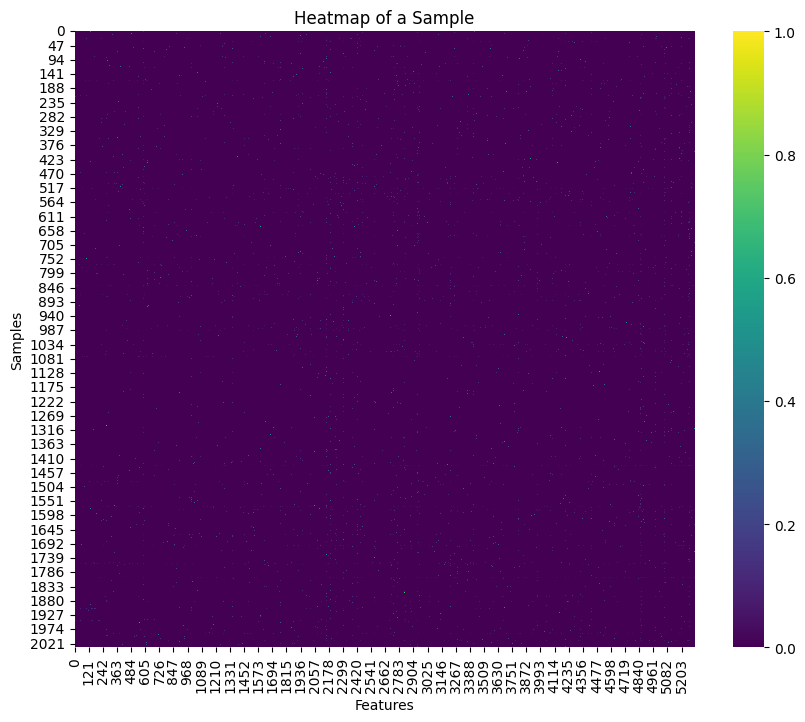

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print(X_train)
print(X_train.todense())

def plot_heatmap(matriz):
  # Create a heatmap of the sample
  plt.figure(figsize=(10, 8))
  sns.heatmap(matriz, cmap='viridis')
  plt.title('Heatmap of a Sample')
  plt.xlabel('Features')
  plt.ylabel('Samples')
  plt.show()

plot_heatmap(X_train.todense())

## TFIDF é normalizada...

In [ ]:
z = X_train.toarray()

z[z != 0], np.min(z), np.max(z)

(array([0.38502646, 0.11288179, 0.10725133, ..., 0.14926035, 0.17346472,
        0.09669961]),
 np.float64(0.0),
 np.float64(1.0))

In [ ]:
import numpy as np

feature_names[np.random.choice(len(feature_names), size=20, replace=False)]

array(['initiation', 'landing', 'sensors', 'aspect', 'reliable', 'mesh',
       'permanent', 'rs6000', 'destruction', 'killing', 'publishes',
       'universe', 'personally', 'opportunities', 'possibility', 'ian',
       'big', 'compressed', '713', 'looking'], dtype=object)

# Classificação

In [ ]:
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier

# clf = RidgeClassifier(tol=1e-2, solver="sparse_cg")
clf = LogisticRegression(max_iter=10000)

clf.fit(X_train, y_train)
pred = clf.predict(X_test)

In [ ]:
clf.coef_, clf.coef_.shape

(array([[-0.26559988,  0.01301841, -0.17059375, ..., -0.14170582,
         -0.11882312,  0.01381462],
        [ 0.23299119, -0.09199039,  0.40228291, ..., -0.02451257,
          0.26122612, -0.04586616],
        [ 0.25120449,  0.08831534, -0.08638891, ..., -0.03700498,
         -0.05844837,  0.06740896],
        [-0.2185958 , -0.00934336, -0.14530025, ...,  0.20322337,
         -0.08395463, -0.03535742]]),
 (4, 5316))

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred, target_names=target_names))

                    precision    recall  f1-score   support

       alt.atheism       0.66      0.62      0.64       319
     comp.graphics       0.88      0.89      0.88       389
         sci.space       0.74      0.90      0.81       394
talk.religion.misc       0.70      0.50      0.58       251

          accuracy                           0.76      1353
         macro avg       0.75      0.73      0.73      1353
      weighted avg       0.75      0.76      0.75      1353



# Feature Importance

In [ ]:
clf.coef_.shape

(4, 5316)

top 5 keywords per class:
  alt.atheism comp.graphics sci.space talk.religion.misc
0         don      graphics     space                god
1      people        thanks      like              jesus
2         god          file      nasa          christian
3         say         image     orbit             people
4    religion         files    launch         christians


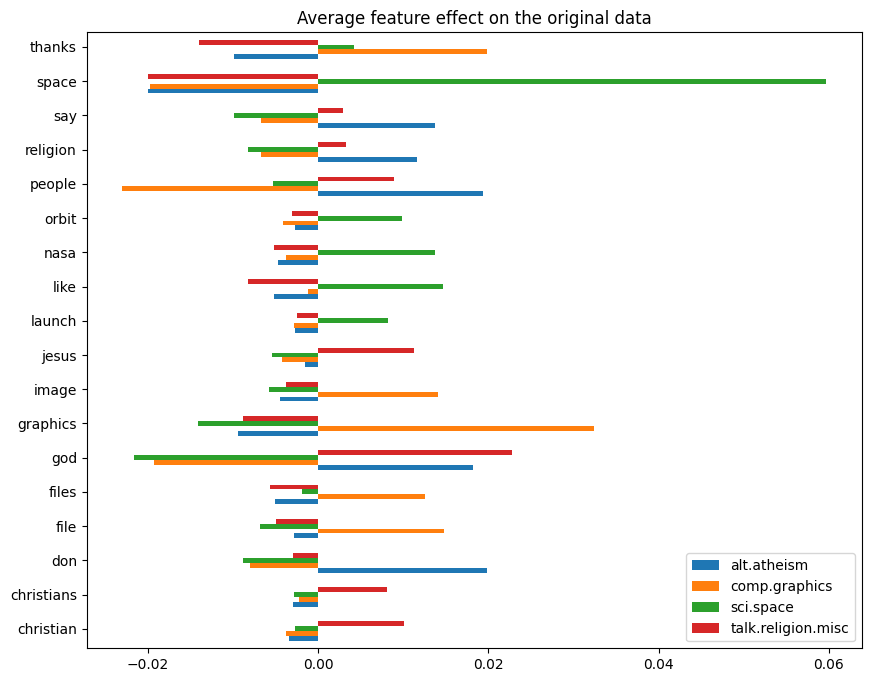

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_feature_effects():
    # learned coefficients weighted by frequency of appearance
    average_feature_effects = clf.coef_ * np.asarray(X_train.mean(axis=0)).ravel()

    for i, label in enumerate(target_names):
        top5 = np.argsort(average_feature_effects[i])[-5:][::-1]
        if i == 0:
            top = pd.DataFrame(feature_names[top5], columns=[label])
            top_indices = top5
        else:
            top[label] = feature_names[top5]
            top_indices = np.concatenate((top_indices, top5), axis=None)
    top_indices = np.unique(top_indices)
    predictive_words = feature_names[top_indices]

    # plot feature effects
    bar_size = 0.25
    padding = 0.75
    y_locs = np.arange(len(top_indices)) * (4 * bar_size + padding)

    fig, ax = plt.subplots(figsize=(10, 8))
    for i, label in enumerate(target_names):
        ax.barh(
            y_locs + (i - 2) * bar_size,
            average_feature_effects[i, top_indices],
            height=bar_size,
            label=label,
        )
    ax.set(
        yticks=y_locs,
        yticklabels=predictive_words,
        ylim=[
            0 - 4 * bar_size,
            len(top_indices) * (4 * bar_size + padding) - 4 * bar_size,
        ],
    )
    ax.legend(loc="lower right")

    print("top 5 keywords per class:")
    print(top)

    return ax


_ = plot_feature_effects().set_title("Average feature effect on the original data")

# Information Gain

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Calculate mutual information gain
mutual_info = mutual_info_classif(X_train.toarray(), y_train == target_names.index("alt.atheism"), discrete_features=False, random_state=42)

mi = pd.DataFrame({
    "feature": feature_names,
    "mutual_info": mutual_info
})

mi = mi.sort_values("mutual_info", ascending=False).reset_index(drop=True)
print("\nTop features by mutual information:")
print(mi.head(5))


Top features by mutual information:
     feature  mutual_info
0       demo     0.037435
1       usaf     0.035357
2  publishes     0.033800
3  additions     0.031232
4     people     0.030889


# Exercício

Em grupos, até 6 integrantes, empregue o **SHAP** https://shap.readthedocs.io/en/latest/ para avaliar a importância das features (termos) e compare os resultados com os obtidos antes. No início o notebook apresente um referencial teórico com o exemplo de aplicação do SHAP a este caso.

Aplicando SHAP ao projeto

In [ ]:
import shap
shap.initjs()

In [ ]:
#Configuração do SHAP Explainer

# LogisticRegression aceita SHAP LinearExplainer com matrizes esparsas
# Cria um masker adequado para dados esparsos
masker = shap.maskers.Independent(X_train)

# Usa o Explainer genérico, que detecta LinearExplainer internamente
explainer = shap.Explainer(clf, masker)

# Calcula os shap values para o conjunto de teste
shap_values = explainer(X_test)

print("Formato shap_values:", shap_values.values.shape)

Formato shap_values: (1353, 5316, 4)


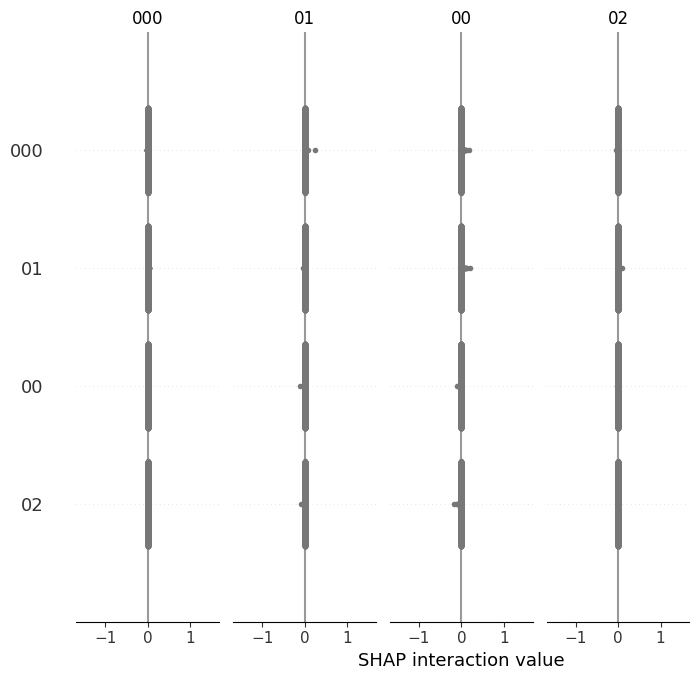

In [ ]:
#Summary plot (importância global)

shap.summary_plot(
    shap_values.values,
    X_test,
    feature_names=feature_names
)


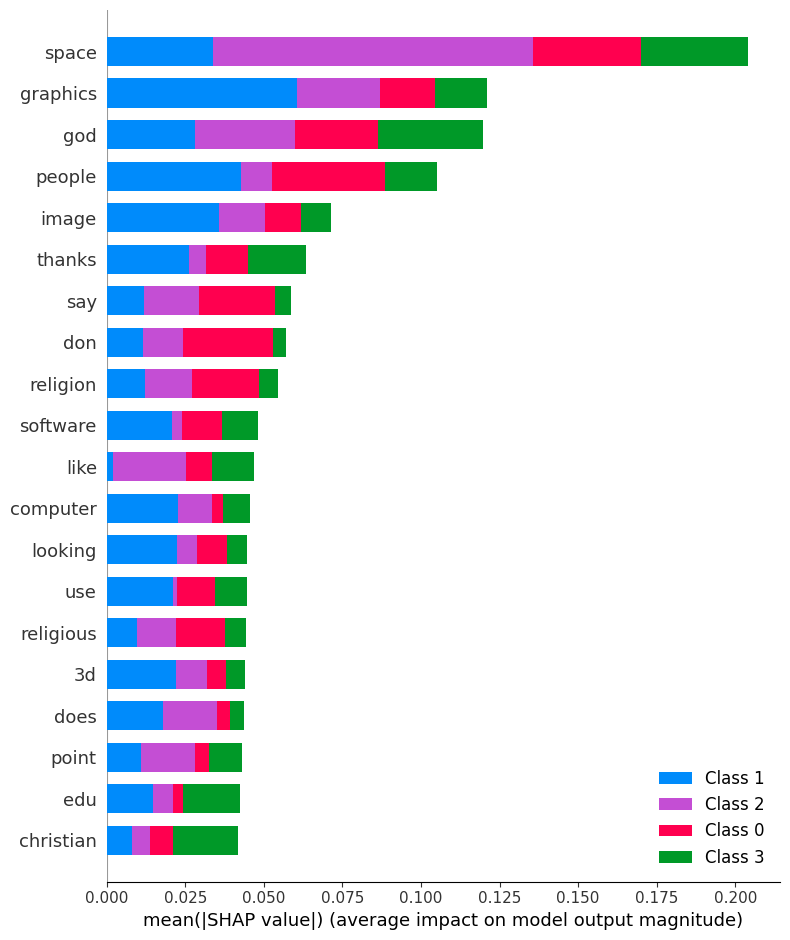

In [ ]:
#Summary plot em barras

shap.summary_plot(
    shap_values.values,
    X_test,
    feature_names=feature_names,
    plot_type="bar"
)


In [ ]:
# Calcula impacto médio absoluto das features (para a primeira classe se multiclasses)
if len(shap_values.values.shape) == 3:  # multiclasses
    mean_abs_shap = np.abs(shap_values.values[:,0,:]).mean(axis=0)
else:
    mean_abs_shap = np.abs(shap_values.values).mean(axis=0)

# Top 10 features
top_n = 10
top_idx = np.argsort(mean_abs_shap)[-top_n:][::-1]  # maiores primeiro
top_features = feature_names[top_idx]

# Exibe em formato texto
print("Top 10 features mais importantes:")
for i, f in enumerate(top_features, 1):
    print(f"{i}. {f}")


Top 10 features mais importantes:
1. data
2. descr
3. target
4. filenames


In [ ]:
# Calcular impacto médio absoluto das features
mean_abs_shap = np.abs(shap_values.values).mean(axis=0)

# Top 10 features
top_n = 10
top_idx = np.argsort(mean_abs_shap)[-top_n:][::-1]  # maiores primeiro
top_features = feature_names[top_idx]

print("Top features:", top_features)

Top features: [['00' '02' '000' '01']
 ['01' '02' '00' '000']
 ['000' '01' '00' '02']
 ['02' '000' '00' '01']
 ['02' '01' '000' '00']
 ['000' '02' '00' '01']
 ['01' '000' '00' '02']
 ['02' '00' '000' '01']
 ['00' '02' '01' '000']
 ['000' '02' '00' '01']]


In [ ]:
# Itera sobre as top features
for idx in top_idx[:10]:
    feature_name = feature_names[idx]
    shap_vals_feature = shap_values.values[:, idx]  # todas as amostras dessa feature

    print(f"\nFeature: {feature_name}")

    for i, val in enumerate(shap_vals_feature):
        # val é um array 2D (ou 1D), vamos mostrar média, mínimo e máximo
        if isinstance(val, np.ndarray):
            mean_val = val.mean()
            min_val = val.min()
            max_val = val.max()
            print(f"  Amostra {i+1}: média {mean_val:.6f}, min {min_val:.6f}, max {max_val:.6f}")
        else:
            print(f"  Amostra {i+1}: impacto {val:.6f}")


Feature: data
  Amostra 1: média 0.000000, min -0.000155, max 0.000164
  Amostra 2: média 0.000000, min -0.000155, max 0.000164
  Amostra 3: média 0.000000, min -0.000155, max 0.000164
  Amostra 4: média 0.000000, min -0.000155, max 0.000164
  Amostra 5: média 0.000000, min -0.000155, max 0.000164
  Amostra 6: média 0.000000, min -0.000155, max 0.000164
  Amostra 7: média 0.000000, min -0.000155, max 0.000164
  Amostra 8: média 0.000000, min -0.000155, max 0.000164
  Amostra 9: média 0.000000, min -0.000155, max 0.000164
  Amostra 10: média 0.000000, min -0.000155, max 0.000164
  Amostra 11: média 0.000000, min -0.000155, max 0.000164
  Amostra 12: média 0.000000, min -0.000155, max 0.000164
  Amostra 13: média -0.000000, min -0.005961, max 0.005638
  Amostra 14: média 0.000000, min -0.000155, max 0.000164
  Amostra 15: média 0.000000, min -0.000155, max 0.000164
  Amostra 16: média 0.000000, min -0.000155, max 0.000164
  Amostra 17: média 0.000000, min -0.000155, max 0.000164
  Amost


Dependence plot para a feature: data para a classe: alt.atheism



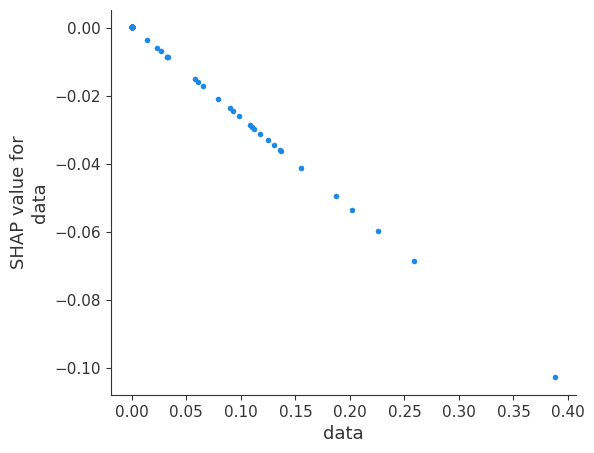


Dependence plot para a feature: descr para a classe: alt.atheism



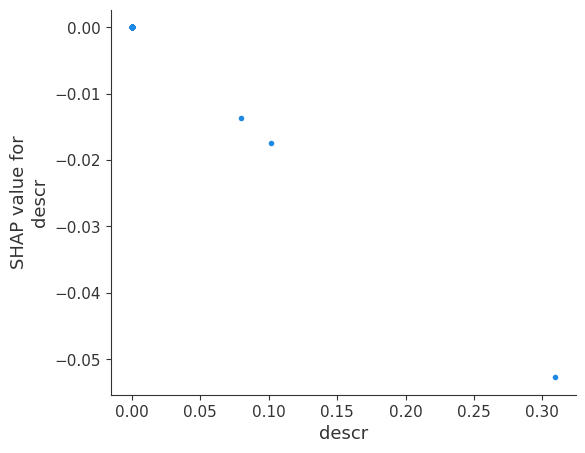


Dependence plot para a feature: target para a classe: alt.atheism



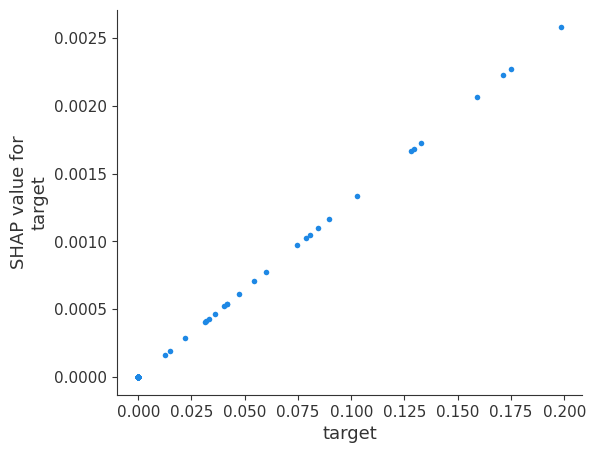


Dependence plot para a feature: filenames para a classe: alt.atheism



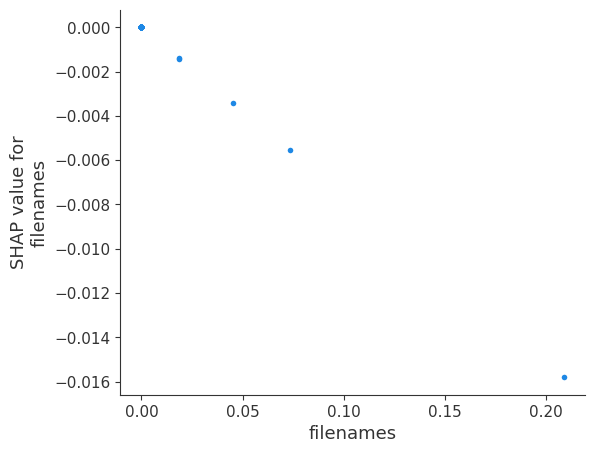

In [ ]:
#Dependence plot feature

top_features = np.array(top_features)
class_to_plot_idx = 0
class_to_plot_name = target_names[class_to_plot_idx]

for f_name in top_features.flatten():
    print(f"\nDependence plot para a feature: {f_name} para a classe: {class_to_plot_name}\n")
    shap.dependence_plot(
        f_name,
        shap_values.values[:, :, class_to_plot_idx], # Select SHAP values for the chosen class
        X_test.toarray(), # Convert X_test to a dense array here
        feature_names=feature_names,
        interaction_index=None # Disable automatic interaction detection to prevent the ValueError
    )